In [36]:
import scipy
import numpy as np 
from keras import backend as K
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.models import load_model, Model
from keras.applications.xception import preprocess_input
import warnings
warnings.filterwarnings('ignore', '.*output shape of zoom.*')

In [7]:
def preprocess_image(image_path):
    test_image = image.load_img(image_path, target_size=(331, 331))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    test_image = preprocess_input(test_image)
    return test_image

In [31]:
def get_model():
    model = load_model('model.h5')
    model = Model(inputs=model.input, outputs=[model.layers[-3].output, model.layers[-1].output])
    weights = model.layers[-1].get_weights()[0]
    return model, weights

In [32]:
def get_cam(model, weights, image_path):
    conv2d_output, predictions = model.predict(preprocess_image(image_path))
    conv2d_output = np.squeeze(conv2d_output)
    pred_class = np.argmax(predictions)
    weight = weights[:, pred_class]
    temp_matrix = scipy.ndimage.zoom(conv2d_output, (30.09, 30.09, 1), order=1)
    temp_matrix = temp_matrix.reshape(331*331, 2048)
    class_activation_map = np.dot(temp_matrix, weight)
    class_activation_map = class_activation_map.reshape(331, 331) 
    return class_activation_map, pred_class
    

In [84]:
def plot_cam(cam, orig_image, pred_class):
    figure, ax = plt.subplots()
    img = image.load_img(orig_image, target_size=(331, 331))
    ax.set_title(labels[pred_class])
    ax.imshow(img,alpha=0.8)
    ax.imshow(cam, cmap='jet',alpha=0.5)
    figure.savefig('cam'+orig_image)

In [86]:
image_path = 'test_01.jpg'
model, weights = get_model()
cam, pred_class = get_cam(model, weights, image_path)

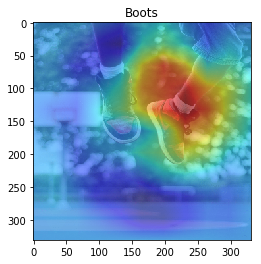

In [87]:
plot_cam(cam, image_path, pred_class)